In [12]:
from custom_gridworld import (
    CustomGridWorld,
    policy_iteration_sync,
    policy_iteration_inplace,
    value_iteration_sync,
    value_iteration_inplace,
    plot_value_function,
    plot_policy,
    plot_convergence,
    visualize_iterations
)
import matplotlib.pyplot as plt
import gymnasium as gym
import pandas as pd
import numpy as np

# TEST CASE 1: Deterministic 4×4 GridWorld

In [13]:
env_det = CustomGridWorld(
    size=(4, 4),
    start=(0, 0),
    terminals=[(0, 0), (3, 3)],
    obstacles=[(1, 1), (2, 2)],
    rewards={(3, 3): 10, (1, 1): -10},
    stochastic=False
)

print(f"Environment: {env_det.rows}×{env_det.cols} grid")
print(f"Terminal states: {env_det.terminals}")
print(f"Obstacles: {env_det.obstacles}")
print(f"Stochastic: {env_det.stochastic}")

Environment: 4×4 grid
Terminal states: [(0, 0), (3, 3)]
Obstacles: [(1, 1), (2, 2)]
Stochastic: False


In [14]:
gamma = 0.9
theta = 1e-6

print("Running Policy Iteration (Synchronous)...")
policy_pi_sync, V_pi_sync, hist_pi_sync = policy_iteration_sync(env_det, gamma, theta)
print(f"Converged in {hist_pi_sync['iterations']} iterations")
print(f"Time: {hist_pi_sync['times'][-1]:.4f} seconds")
print()

print("Running Policy Iteration (In-Place)...")
policy_pi_inplace, V_pi_inplace, hist_pi_inplace = policy_iteration_inplace(env_det, gamma, theta)
print(f"Converged in {hist_pi_inplace['iterations']} iterations")
print(f"Time: {hist_pi_inplace['times'][-1]:.4f} seconds")
print()

print("Running Value Iteration (Synchronous)...")
policy_vi_sync, V_vi_sync, hist_vi_sync = value_iteration_sync(env_det, gamma, theta)
print(f"Converged in {hist_vi_sync['iterations']} iterations")
print(f"Time: {hist_vi_sync['times'][-1]:.4f} seconds")
print()

print("Running Value Iteration (In-Place)...")
policy_vi_inplace, V_vi_inplace, hist_vi_inplace = value_iteration_inplace(env_det, gamma, theta)
print(f"Converged in {hist_vi_inplace['iterations']} iterations")
print(f"Time: {hist_vi_inplace['times'][-1]:.4f} seconds")
print()

Running Policy Iteration (Synchronous)...
Converged in 4 iterations
Time: 0.0301 seconds

Running Policy Iteration (In-Place)...
Converged in 4 iterations
Time: 0.0194 seconds

Running Value Iteration (Synchronous)...
Converged in 154 iterations
Time: 0.0084 seconds

Running Value Iteration (In-Place)...
Converged in 154 iterations
Time: 0.0080 seconds



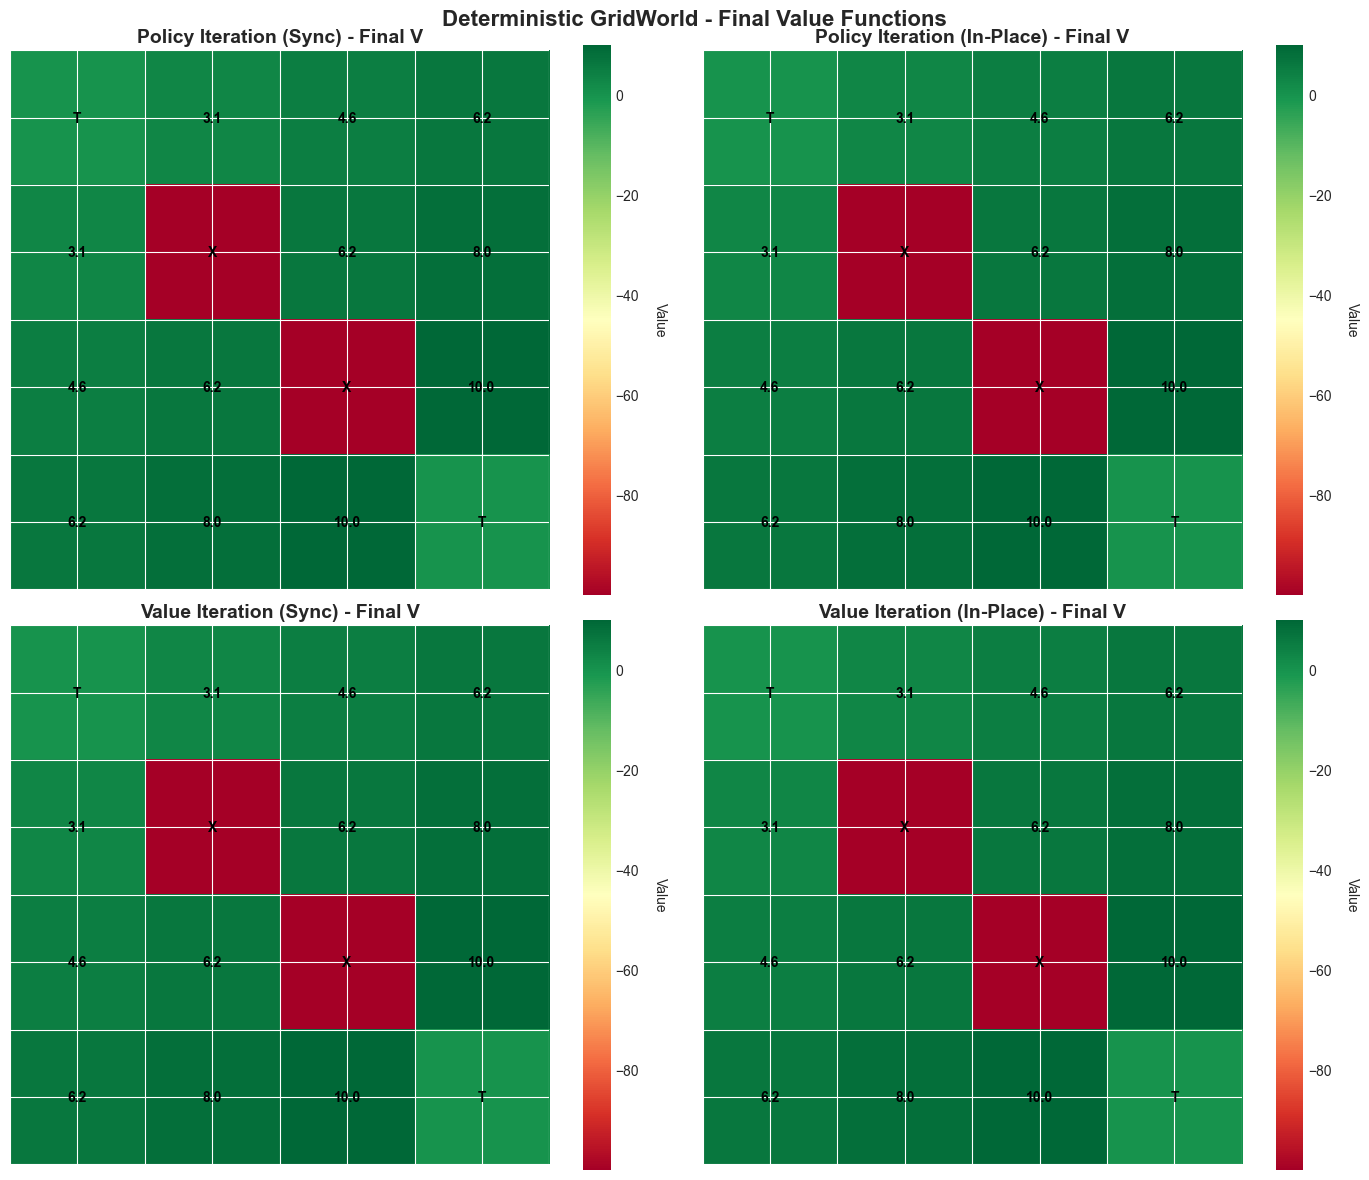

In [15]:
# Plot final value functions
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plot_value_function(env_det, V_pi_sync, "Policy Iteration (Sync) - Final V", axes[0, 0])
plot_value_function(env_det, V_pi_inplace, "Policy Iteration (In-Place) - Final V", axes[0, 1])
plot_value_function(env_det, V_vi_sync, "Value Iteration (Sync) - Final V", axes[1, 0])
plot_value_function(env_det, V_vi_inplace, "Value Iteration (In-Place) - Final V", axes[1, 1])
plt.suptitle("Deterministic GridWorld - Final Value Functions", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

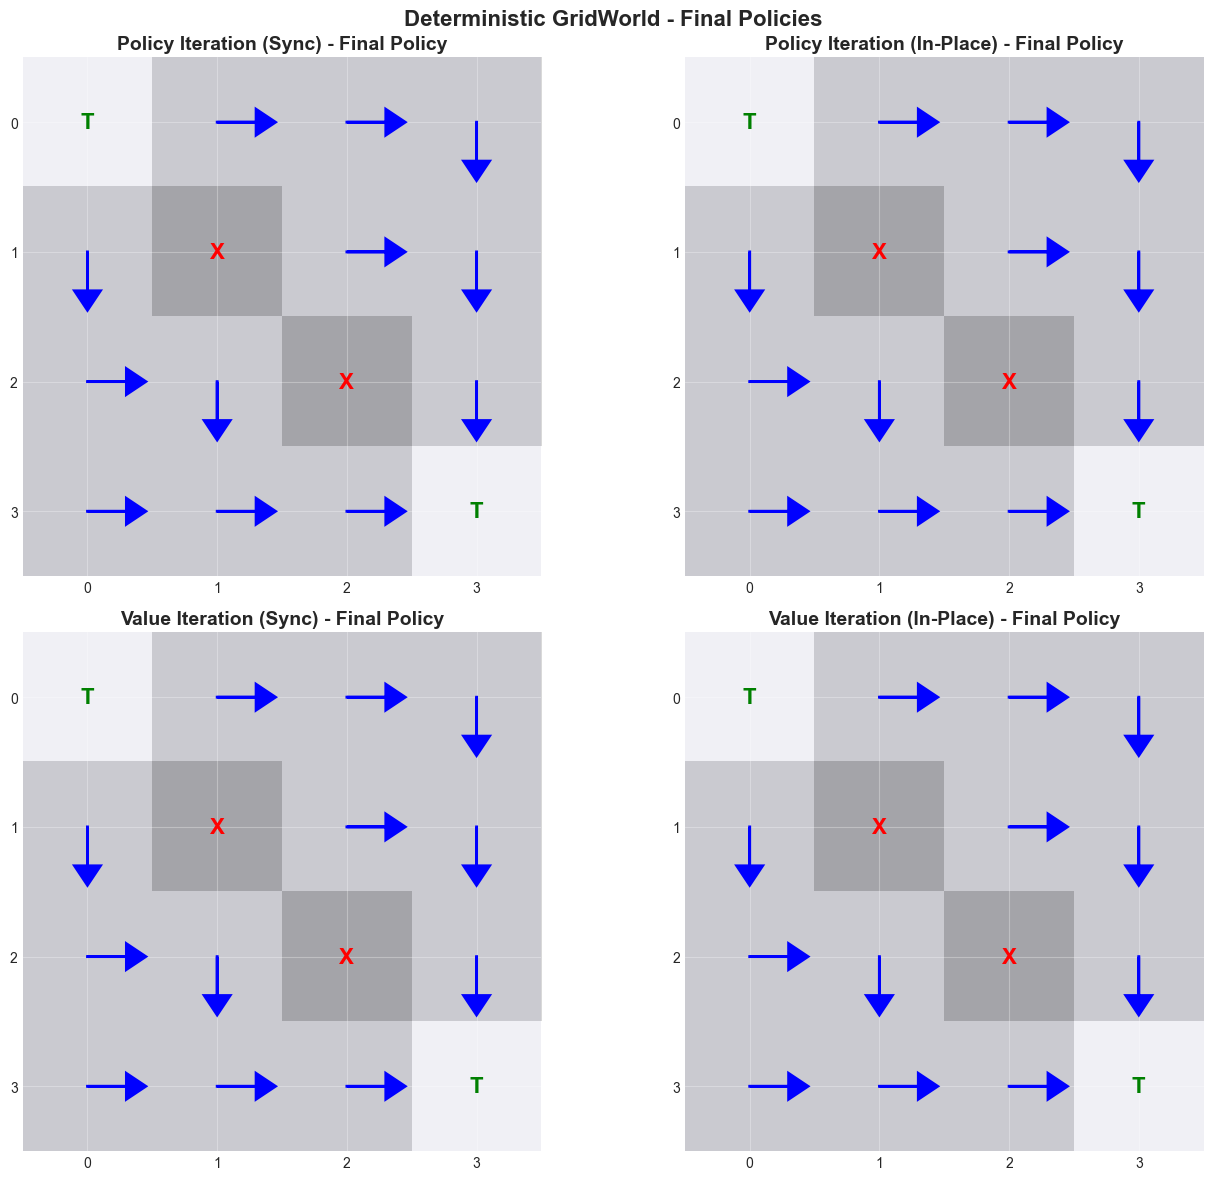

In [16]:
# Plot final policies
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plot_policy(env_det, policy_pi_sync, "Policy Iteration (Sync) - Final Policy", axes[0, 0])
plot_policy(env_det, policy_pi_inplace, "Policy Iteration (In-Place) - Final Policy", axes[0, 1])
plot_policy(env_det, policy_vi_sync, "Value Iteration (Sync) - Final Policy", axes[1, 0])
plot_policy(env_det, policy_vi_inplace, "Value Iteration (In-Place) - Final Policy", axes[1, 1])
plt.suptitle("Deterministic GridWorld - Final Policies", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


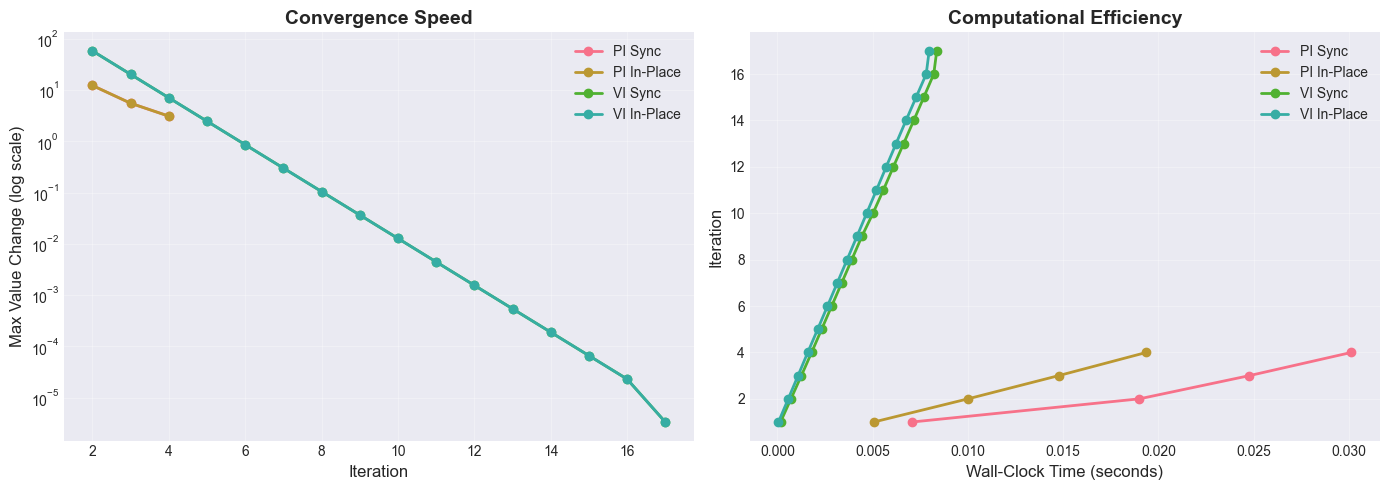

In [17]:
# Plot convergence comparison
histories_det = [hist_pi_sync, hist_pi_inplace, hist_vi_sync, hist_vi_inplace]
labels_det = ['PI Sync', 'PI In-Place', 'VI Sync', 'VI In-Place']
plot_convergence(histories_det, labels_det, "Deterministic GridWorld - Convergence")
plt.show()

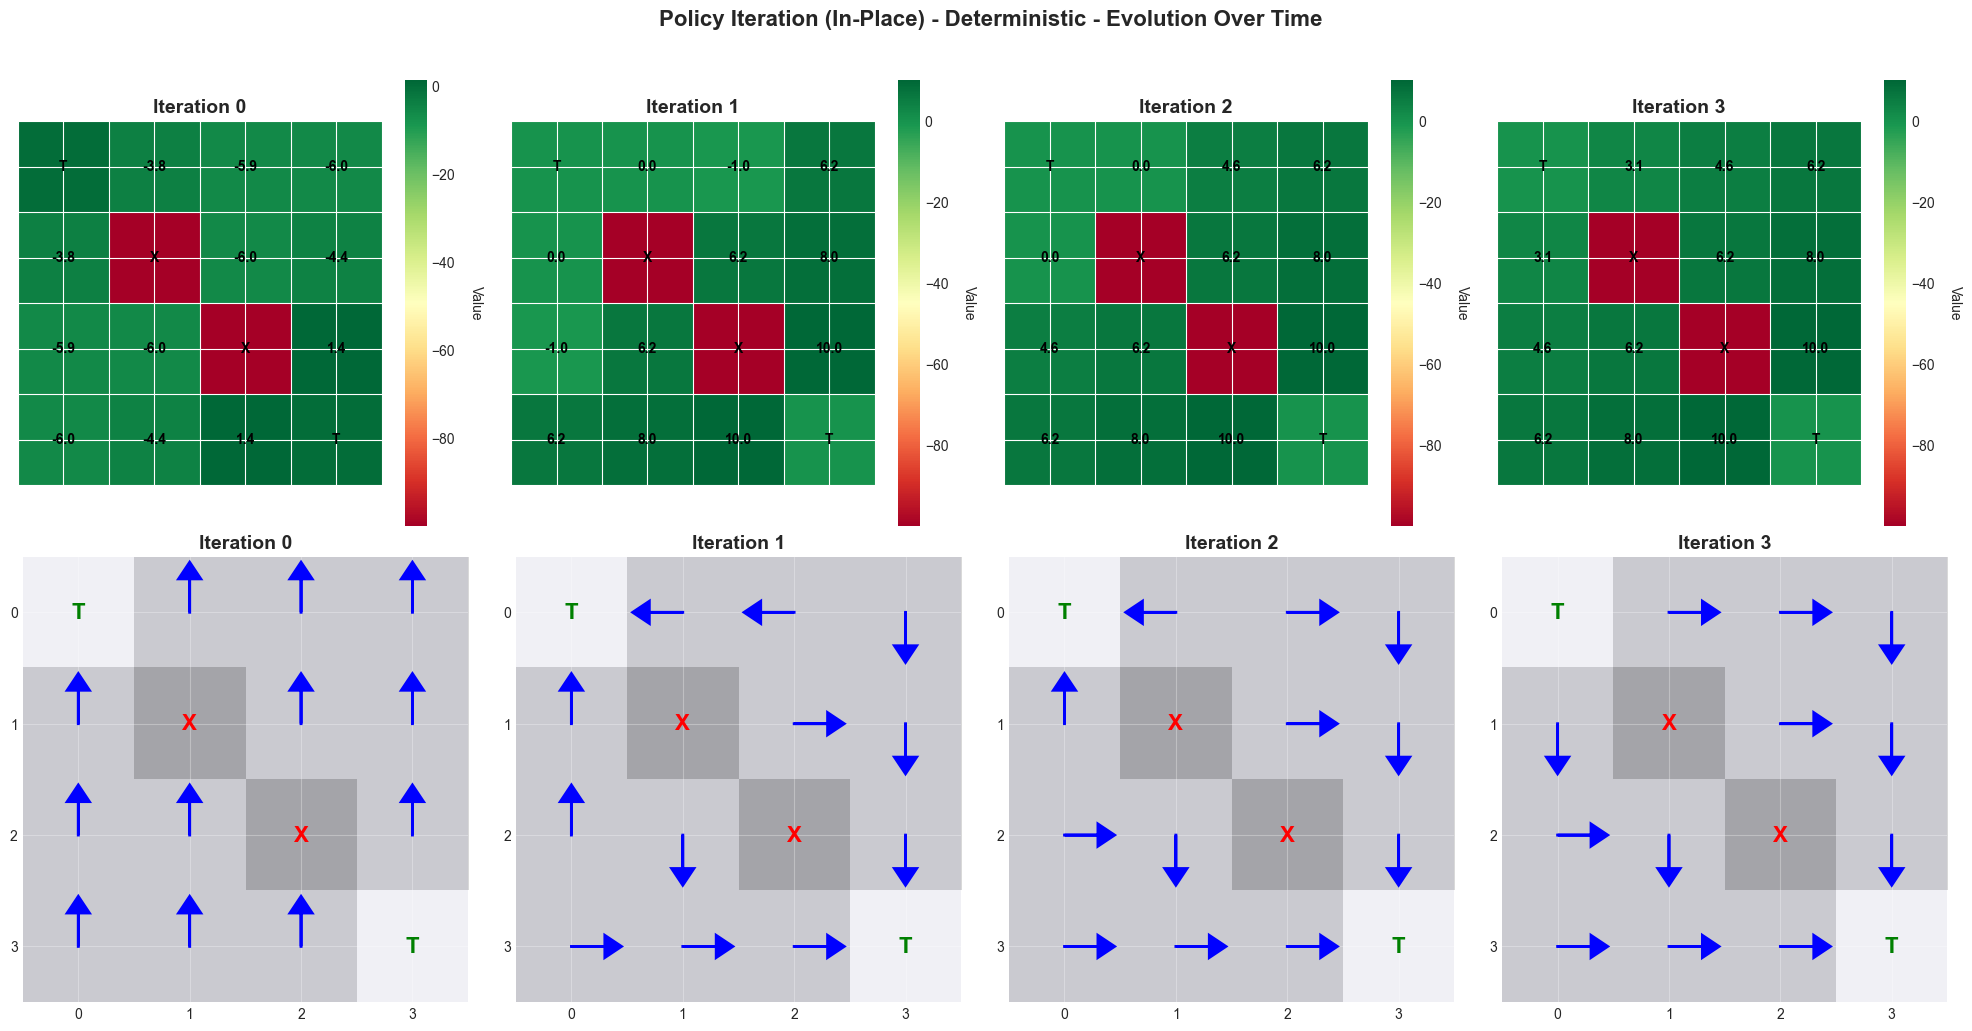

In [18]:
# Plot evolution for Policy Iteration (In-Place)
visualize_iterations(env_det, hist_pi_inplace['V_history'], 
                    hist_pi_inplace['policy_history'], 
                    "Policy Iteration (In-Place) - Deterministic")
plt.show()

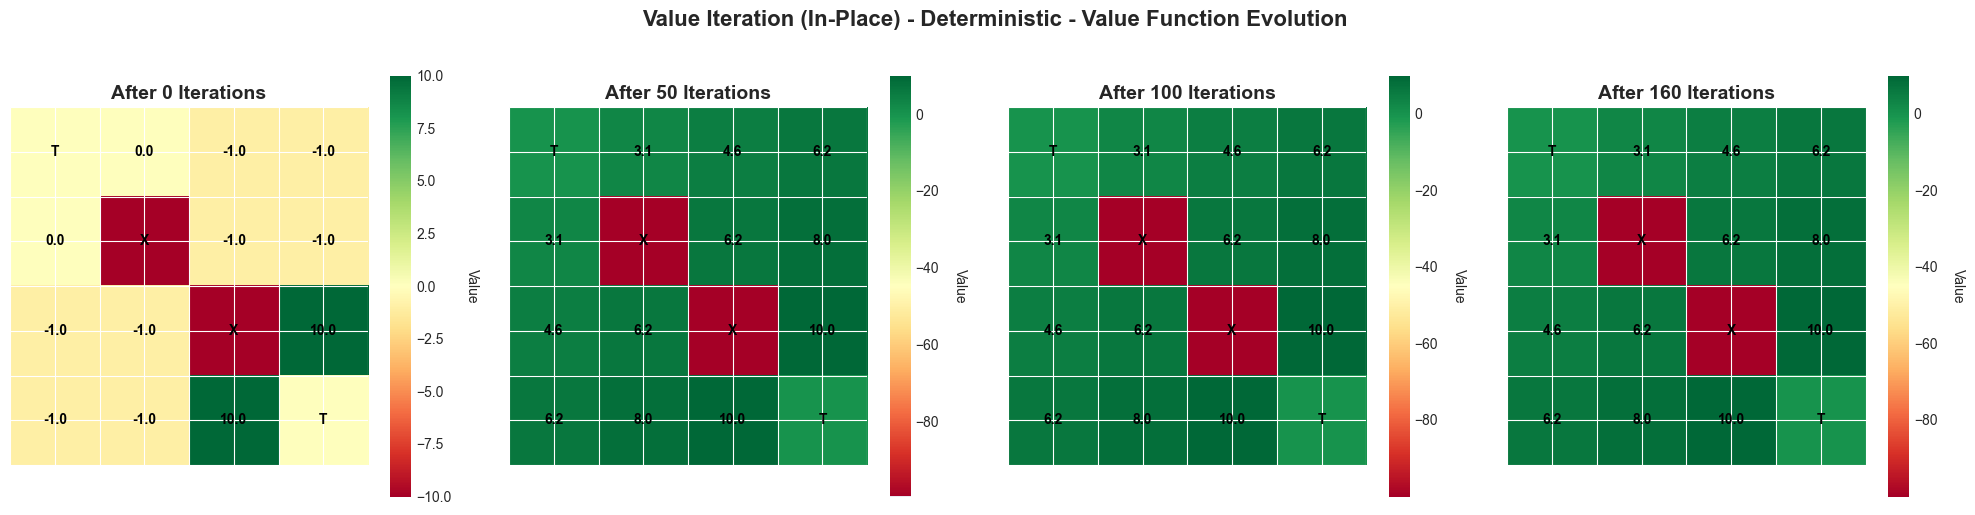

In [ ]:
# Plot evolution for Value Iteration (In-Place)
V_history = hist_vi_inplace['V_history']
algorithm_name = "Value Iteration (In-Place) - Deterministic"
env = env_det

n_iters = len(V_history)

n_plots = min(4, n_iters)
indices = np.linspace(0, n_iters - 1, n_plots, dtype=int)

fig, axes = plt.subplots(1, n_plots, figsize=(5 * n_plots, 5))

if n_plots == 1:
    axes = [axes]
        
for idx, i in enumerate(indices):
    # The history for VI was saved every 10 iterations.
    iter_num_for_title = i * 10 if i > 0 else 0
    
    plot_value_function(env, V_history[i], 
                        title=f"After {iter_num_for_title} Iterations",
                        ax=axes[idx])

# Add a main title to the figure
fig.suptitle(f'{algorithm_name} - Value Function Evolution', 
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


# TEST CASE 2: Stochastic 5×5 GridWorld (80% intended, 10% each perpendicular)


In [20]:
# Create stochastic environment
env_stoch = CustomGridWorld(
    size=(5, 5),
    start=(0, 0),
    terminals=[(4, 4)],
    obstacles=[(2, 2), (1, 3), (3, 1)],
    rewards={(4, 4): 100, (2, 4): -50, (4, 0): -50},
    stochastic=True,
    slip_prob=0.1  # 80% intended, 10% each perpendicular
)

print(f"Environment: {env_stoch.rows}×{env_stoch.cols} grid")
print(f"Terminal states: {env_stoch.terminals}")
print(f"Obstacles: {env_stoch.obstacles}")
print(f"Stochastic: {env_stoch.stochastic} (slip_prob={env_stoch.slip_prob})")
print()

Environment: 5×5 grid
Terminal states: [(4, 4)]
Obstacles: [(2, 2), (1, 3), (3, 1)]
Stochastic: True (slip_prob=0.1)



In [21]:
# Run all four algorithms
print("Running Policy Iteration (Synchronous)...")
policy_pi_sync_s, V_pi_sync_s, hist_pi_sync_s = policy_iteration_sync(env_stoch, gamma, theta)
print(f"Converged in {hist_pi_sync_s['iterations']} iterations")
print(f"Time: {hist_pi_sync_s['times'][-1]:.4f} seconds")
print()

print("Running Policy Iteration (In-Place)...")
policy_pi_inplace_s, V_pi_inplace_s, hist_pi_inplace_s = policy_iteration_inplace(env_stoch, gamma, theta)
print(f"Converged in {hist_pi_inplace_s['iterations']} iterations")
print(f"Time: {hist_pi_inplace_s['times'][-1]:.4f} seconds")
print()

print("Running Value Iteration (Synchronous)...")
policy_vi_sync_s, V_vi_sync_s, hist_vi_sync_s = value_iteration_sync(env_stoch, gamma, theta)
print(f"Converged in {hist_vi_sync_s['iterations']} iterations")
print(f"Time: {hist_vi_sync_s['times'][-1]:.4f} seconds")
print()

print("Running Value Iteration (In-Place)...")
policy_vi_inplace_s, V_vi_inplace_s, hist_vi_inplace_s = value_iteration_inplace(env_stoch, gamma, theta)
print(f"Converged in {hist_vi_inplace_s['iterations']} iterations")
print(f"Time: {hist_vi_inplace_s['times'][-1]:.4f} seconds")
print()

Running Policy Iteration (Synchronous)...
Converged in 7 iterations
Time: 0.1595 seconds

Running Policy Iteration (In-Place)...
Converged in 8 iterations
Time: 0.1054 seconds

Running Value Iteration (Synchronous)...
Converged in 154 iterations
Time: 0.0229 seconds

Running Value Iteration (In-Place)...
Converged in 154 iterations
Time: 0.0207 seconds



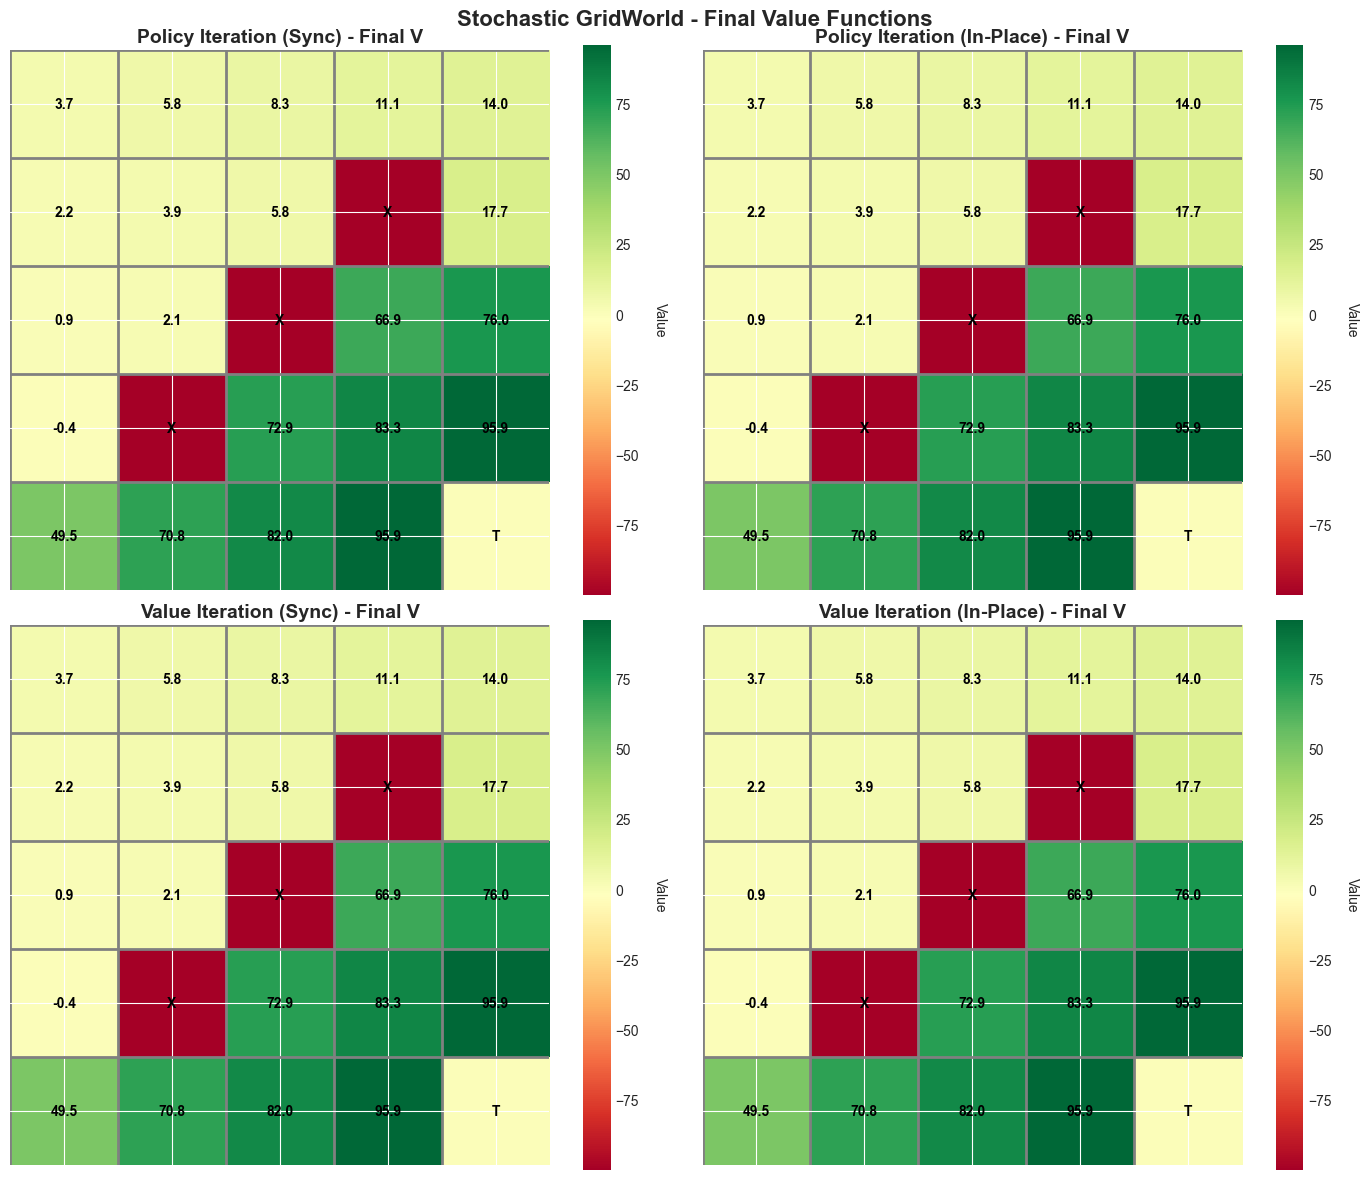

In [22]:
# Plot final value functions
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plot_value_function(env_stoch, V_pi_sync_s, "Policy Iteration (Sync) - Final V", axes[0, 0])
plot_value_function(env_stoch, V_pi_inplace_s, "Policy Iteration (In-Place) - Final V", axes[0, 1])
plot_value_function(env_stoch, V_vi_sync_s, "Value Iteration (Sync) - Final V", axes[1, 0])
plot_value_function(env_stoch, V_vi_inplace_s, "Value Iteration (In-Place) - Final V", axes[1, 1])
plt.suptitle("Stochastic GridWorld - Final Value Functions", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

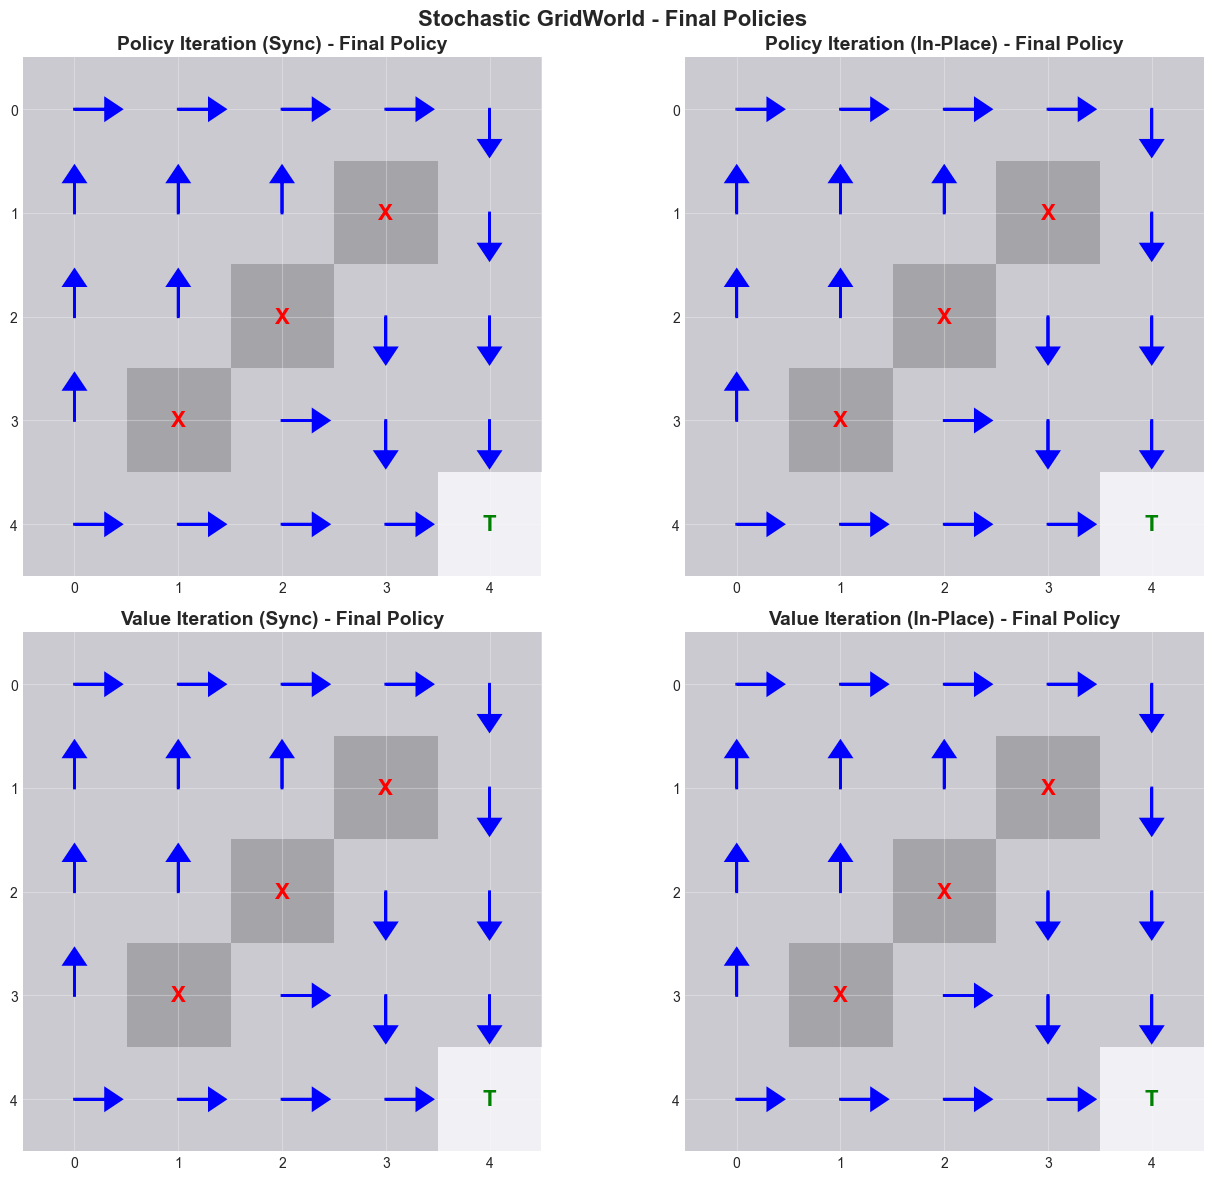

In [23]:
# Plot final policies
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plot_policy(env_stoch, policy_pi_sync_s, "Policy Iteration (Sync) - Final Policy", axes[0, 0])
plot_policy(env_stoch, policy_pi_inplace_s, "Policy Iteration (In-Place) - Final Policy", axes[0, 1])
plot_policy(env_stoch, policy_vi_sync_s, "Value Iteration (Sync) - Final Policy", axes[1, 0])
plot_policy(env_stoch, policy_vi_inplace_s, "Value Iteration (In-Place) - Final Policy", axes[1, 1])
plt.suptitle("Stochastic GridWorld - Final Policies", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

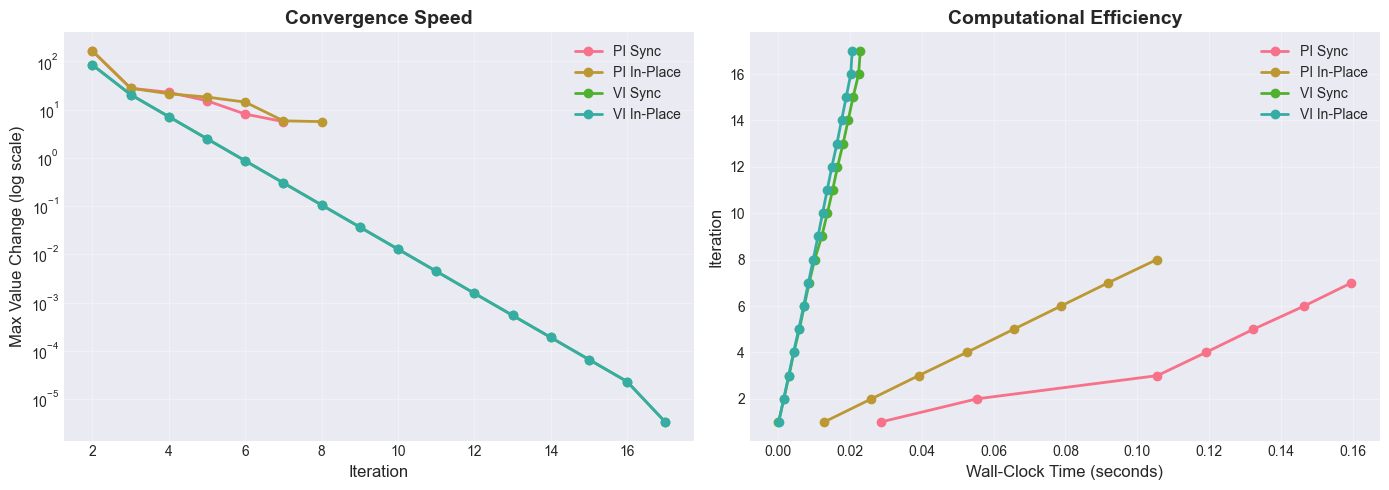

In [24]:
# Plot convergence comparison
histories_stoch = [hist_pi_sync_s, hist_pi_inplace_s, hist_vi_sync_s, hist_vi_inplace_s]
labels_stoch = ['PI Sync', 'PI In-Place', 'VI Sync', 'VI In-Place']
plot_convergence(histories_stoch, labels_stoch, "Stochastic GridWorld - Convergence")
plt.show()

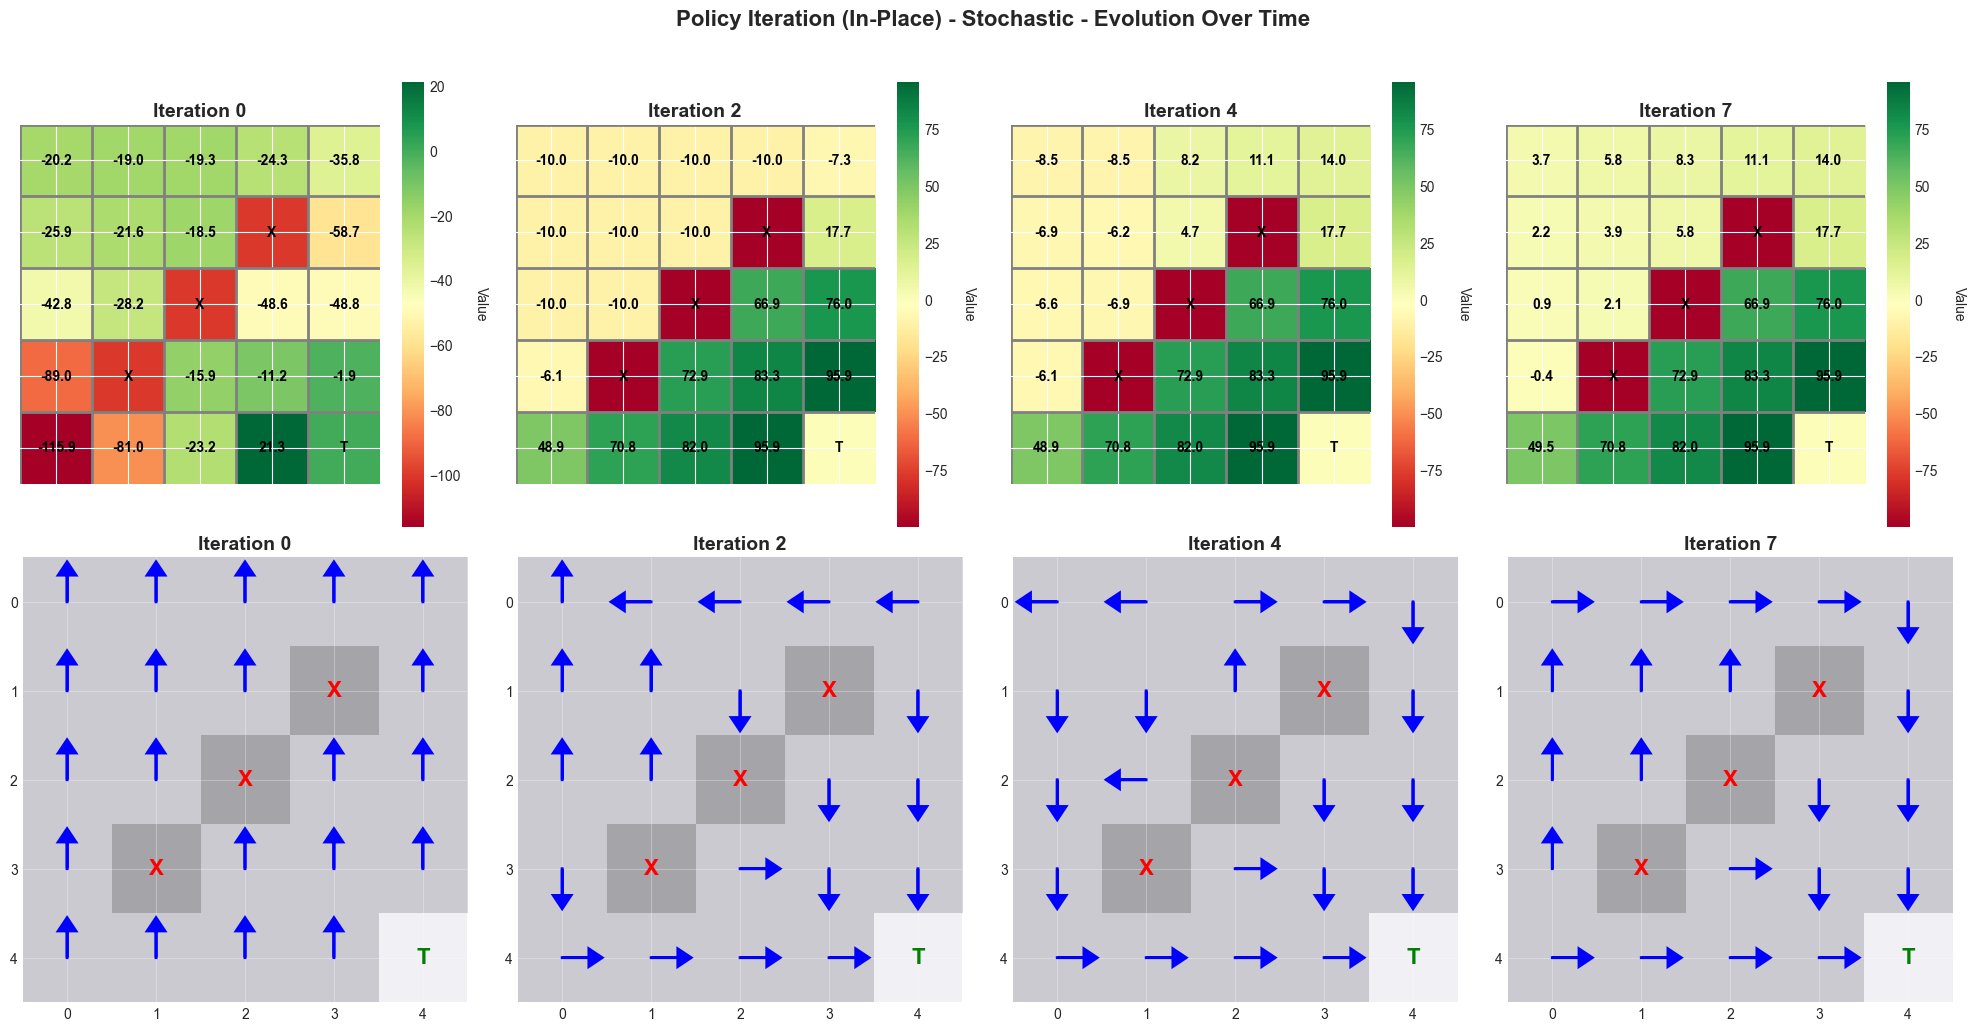

In [25]:
# Plot evolution for Policy Iteration (In-Place)
visualize_iterations(env_stoch, hist_pi_inplace_s['V_history'], 
                    hist_pi_inplace_s['policy_history'], 
                    "Policy Iteration (In-Place) - Stochastic")
plt.show()

# TEST CASE 3: Gymnasium FrozenLake-v1 (4×4, Stochastic)

In [32]:
env_fl = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

class FrozenLakeWrapper:
    def __init__(self, gym_env):
        # Unwrap nested Gym wrappers (TimeLimit, OrderEnforcing, etc.)
        env = gym_env
        while hasattr(env, "env"):
            env = env.env
        self.env = env
        
        self.nS = self.env.observation_space.n
        self.nA = self.env.action_space.n
        self.P = self.env.P
        self.rows = 4
        self.cols = 4

        # Identify terminal and obstacle states
        self.terminal_states = []
        self.obstacle_states = []  # <--- Added to avoid AttributeError
        
        # Identify terminal states (holes + goal)
        for s in range(self.nS):
            for a in range(self.nA):
                if self.P[s][a][0][3]:  # Check 'done' flag
                    self.terminal_states.append(s)
                    break
        
        # For FrozenLake, we can consider holes as "obstacles" visually
        # So we treat all terminal states except the last one (goal) as obstacles
        if len(self.terminal_states) > 1:
            self.obstacle_states = self.terminal_states[:-1]

        # Action deltas (FrozenLake: L, D, U, R)
        self.action_deltas = [(-1, 0), (1, 0), (0, -1), (0, 1)]


fl_env = FrozenLakeWrapper(env_fl)

print("Running Policy Iteration (In-Place)...")
policy_pi_fl, V_pi_fl, hist_pi_fl = policy_iteration_inplace(fl_env, gamma, theta)
print(f"Converged in {hist_pi_fl['iterations']} iterations")
print(f"Time: {hist_pi_fl['times'][-1]:.4f} seconds")
print()

print("Running Value Iteration (In-Place)...")
policy_vi_fl, V_vi_fl, hist_vi_fl = value_iteration_inplace(fl_env, gamma, theta)
print(f"Converged in {hist_vi_fl['iterations']} iterations")
print(f"Time: {hist_vi_fl['times'][-1]:.4f} seconds")
print()


Running Policy Iteration (In-Place)...
Converged in 2 iterations
Time: 0.0139 seconds

Running Value Iteration (In-Place)...
Converged in 60 iterations
Time: 0.0079 seconds



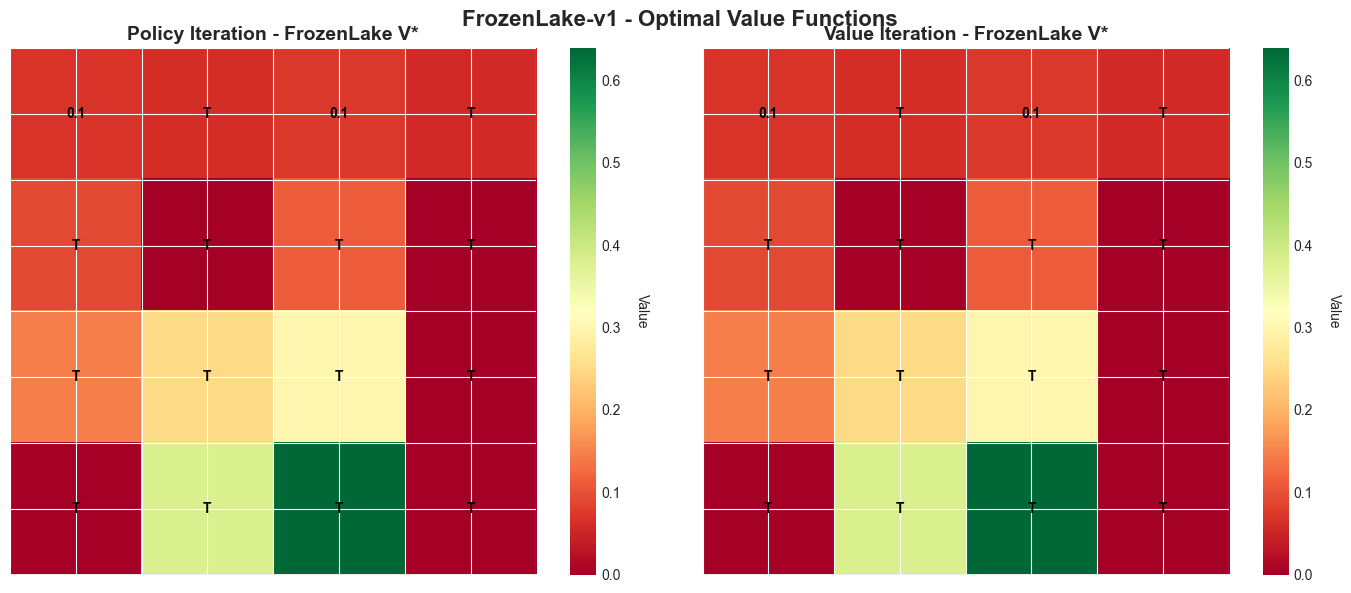

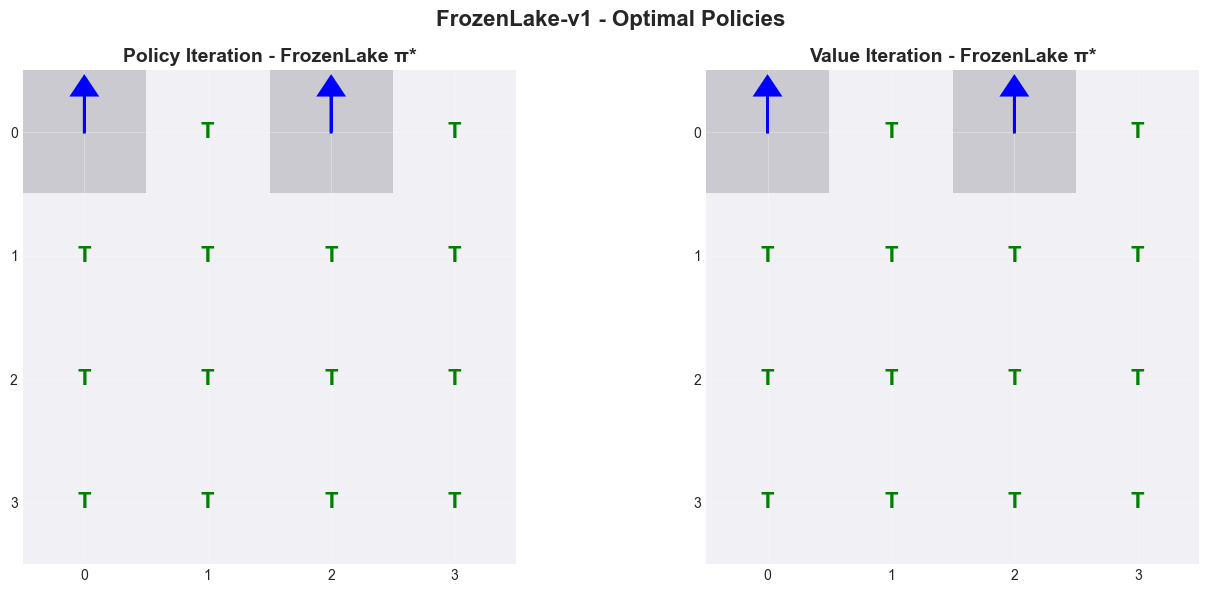

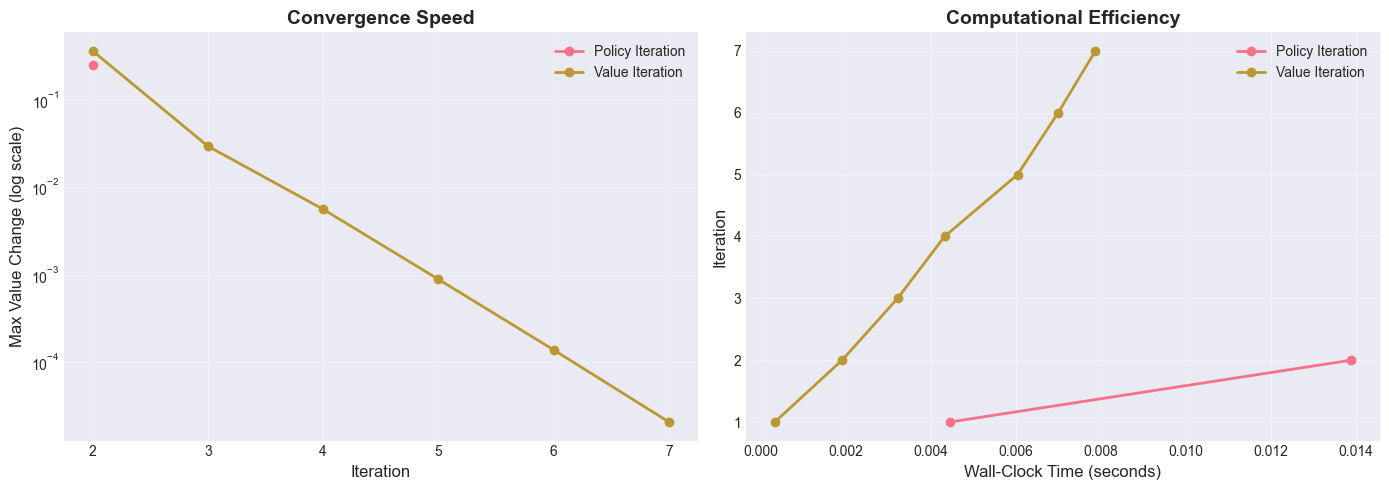

In [33]:
# Plot value functions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_value_function(fl_env, V_pi_fl, "Policy Iteration - FrozenLake V*", axes[0])
plot_value_function(fl_env, V_vi_fl, "Value Iteration - FrozenLake V*", axes[1])
plt.suptitle("FrozenLake-v1 - Optimal Value Functions", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Plot policies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_policy(fl_env, policy_pi_fl, "Policy Iteration - FrozenLake π*", axes[0])
plot_policy(fl_env, policy_vi_fl, "Value Iteration - FrozenLake π*", axes[1])
plt.suptitle("FrozenLake-v1 - Optimal Policies", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Plot convergence
histories_fl = [hist_pi_fl, hist_vi_fl]
labels_fl = ['Policy Iteration', 'Value Iteration']
plot_convergence(histories_fl, labels_fl, "FrozenLake-v1 - Convergence")
plt.show()

In [34]:
import pandas as pd

# Create comparison dataframe
comparison_data = {
    'Environment': [
        'Deterministic 4×4', 'Deterministic 4×4', 'Deterministic 4×4', 'Deterministic 4×4',
        'Stochastic 5×5', 'Stochastic 5×5', 'Stochastic 5×5', 'Stochastic 5×5',
        'FrozenLake 4×4', 'FrozenLake 4×4'
    ],
    'Algorithm': [
        'PI Sync', 'PI In-Place', 'VI Sync', 'VI In-Place',
        'PI Sync', 'PI In-Place', 'VI Sync', 'VI In-Place',
        'PI In-Place', 'VI In-Place'
    ],
    'Iterations': [
        hist_pi_sync['iterations'], hist_pi_inplace['iterations'],
        hist_vi_sync['iterations'], hist_vi_inplace['iterations'],
        hist_pi_sync_s['iterations'], hist_pi_inplace_s['iterations'],
        hist_vi_sync_s['iterations'], hist_vi_inplace_s['iterations'],
        hist_pi_fl['iterations'], hist_vi_fl['iterations']
    ],
    'Time (s)': [
        hist_pi_sync['times'][-1], hist_pi_inplace['times'][-1],
        hist_vi_sync['times'][-1], hist_vi_inplace['times'][-1],
        hist_pi_sync_s['times'][-1], hist_pi_inplace_s['times'][-1],
        hist_vi_sync_s['times'][-1], hist_vi_inplace_s['times'][-1],
        hist_pi_fl['times'][-1], hist_vi_fl['times'][-1]
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("\n" + "=" * 80)
print("COMPREHENSIVE COMPARISON TABLE")
print("=" * 80)
print(df_comparison.to_string(index=False))
print()

# ## 18. Statistical Analysis

# Group by algorithm type
print("\n" + "=" * 80)
print("AVERAGE PERFORMANCE BY ALGORITHM TYPE")
print("=" * 80)
avg_by_algo = df_comparison.groupby('Algorithm')[['Iterations', 'Time (s)']].mean()
print(avg_by_algo)
print()

# Group by environment
print("\n" + "=" * 80)
print("AVERAGE PERFORMANCE BY ENVIRONMENT")
print("=" * 80)
avg_by_env = df_comparison.groupby('Environment')[['Iterations', 'Time (s)']].mean()
print(avg_by_env)
print()



COMPREHENSIVE COMPARISON TABLE
      Environment   Algorithm  Iterations  Time (s)
Deterministic 4×4     PI Sync           4  0.030134
Deterministic 4×4 PI In-Place           4  0.019370
Deterministic 4×4     VI Sync         154  0.008365
Deterministic 4×4 VI In-Place         154  0.007967
   Stochastic 5×5     PI Sync           7  0.159540
   Stochastic 5×5 PI In-Place           8  0.105357
   Stochastic 5×5     VI Sync         154  0.022923
   Stochastic 5×5 VI In-Place         154  0.020661
   FrozenLake 4×4 PI In-Place           2  0.013884
   FrozenLake 4×4 VI In-Place          60  0.007867


AVERAGE PERFORMANCE BY ALGORITHM TYPE
             Iterations  Time (s)
Algorithm                        
PI In-Place    4.666667  0.046204
PI Sync        5.500000  0.094837
VI In-Place  122.666667  0.012165
VI Sync      154.000000  0.015644


AVERAGE PERFORMANCE BY ENVIRONMENT
                   Iterations  Time (s)
Environment                            
Deterministic 4×4       79.00  0.01